In [20]:
from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 
percentify = lambda x: (x * 100).round(1).astype(str) + "%"

Populating the interactive namespace from numpy and matplotlib


Logistically modeled deprivation scores:
For  0 hrs: 100.0 %
For  1 hrs: 93.0 %
For  2 hrs: 83.0 %
For  3 hrs: 70.0 %
For  4 hrs: 54.0 %
For  5 hrs: 38.0 %
For  6 hrs: 23.0 %
For  7 hrs: 10.0 %
For  8 hrs: 0.0 %

Logistic model plot:


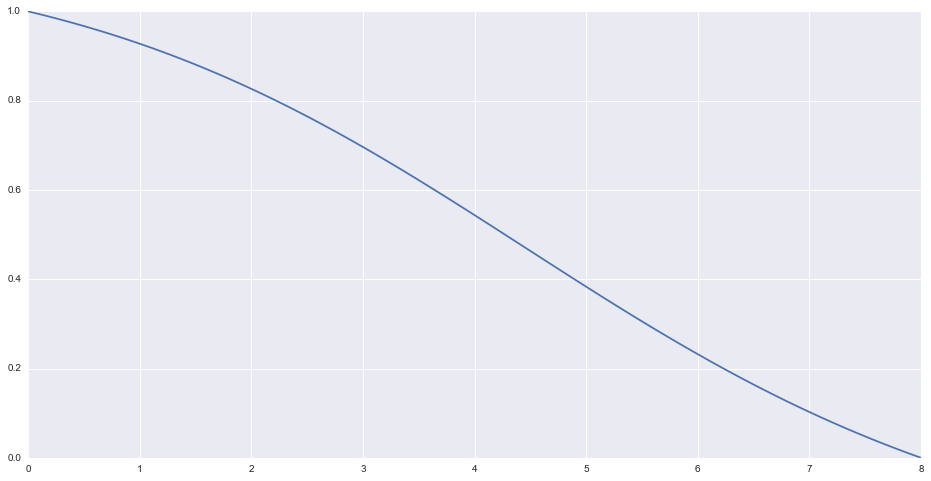

In [10]:
# Model the daily sleep below 8hrs as a comparison to all nighters

def g(x):
    val = (1+np.exp(0.5*(x-4)))**-1
    return val**0.8

def deprivation_score(x):
    return (g(x) - g(8))/(g(0) - g(8))

print "Logistically modeled deprivation scores:"
for x in xrange(9):
    logscore = deprivation_score(x)
    print "For ", x, "hrs:", 100*round(logscore,2), '%'

print "\nLogistic model plot:"
domain = np.linspace(0,8,100)
plt.plot(domain,deprivation_score(domain))
plt.ylim([0,1])
plt.show()

In [22]:
# Get a nice DataFrame with useful columns from each .csv file
def load_month(filename):
    
    data = pd.read_csv(filename,skiprows=1)
    data = data.loc[:,['Start Time','End Time','Minutes Asleep','Time in Bed']]

    data['Start Time'] = pd.to_datetime(data['Start Time'])
    data['End Time'] = pd.to_datetime(data['End Time'])
    
    data['Date'] = data['End Time'].dt.date
    data['Week'] = data['End Time'].dt.week
    data['Weekday'] = data['End Time'].dt.weekday
    data['WeekdayName'] = data['End Time'].dt.weekday_name
    data['Start Time'] = data['Start Time'].dt.time
    data['End Time'] = data['End Time'].dt.time
    
    return data

# Deal with the naps
def fix_naps(filename):
    pass

def get_months(end_month, end_year):
    
    month, year, months = 9, 2015, []
    
    while month <= end_month or year < end_year:
        
        if month < 10:
            months.append('0'+str(month)+'_'+str(year)+'.csv')
        else:
            months.append(str(month)+'_'+str(year)+'.csv')
        
        month += 1
        if month > 12:
            month = 1
            year += 1
            
    return months

def deprivation_metric(series):
    x = np.array(series)
    x = x/60.0
    x[x>8] = 8
    return np.mean(deprivation_score(x))
    
def avg_datetime(series):
    dt_min = series.min()
    deltas = [x-dt_min for x in series]
    return dt_min + functools.reduce(operator.add, deltas) / len(deltas)


# Plot weekly data for the length of time included in month_names
def plot_weekly(month_names):
    
    # Plot mean time asleep
    
    # Plot % time in bed spent asleep
    
    # Plot deprivation metric
    
    # Plot mean bedtime
    
    # Plot stdev of bedtime
    
    # Plot mean wakeup time
    
    # Plot stdev of wakeup time
    
    pass

# Plot monthly data for the length of time included in month_names
def plot_monthly(month_names):
    
    data = [load_month(month) for month in month_names]
    months = []
    for i in xrange(len(month_names)):
        date = data[i]['Date'][0]
        months.append(date.strftime('%b')+' '+date.strftime('%Y'))
        
    # Plot max time asleep
    time_asleep = [m['Minutes Asleep'].max()/60.0 for m in data]
    pd.Series(time_asleep, index=months).plot("bar", rot=45, fontsize=16)
    plt.title('Max Hours of Sleep by Month', fontsize=16)
    plt.show()
        
    # Plot mean time asleep
    time_asleep = [m['Minutes Asleep'].mean()/60.0 for m in data]
    pd.Series(time_asleep, index=months).plot("bar", rot=45, fontsize=16)
    plt.title('Mean Hours of Sleep by Month', fontsize=16)
    plt.show()
    
    # Plot standard deviation of time asleep
    time_asleep = [m['Minutes Asleep'].std()/60.0 for m in data]
    pd.Series(time_asleep, index=months).plot("bar", rot=45, fontsize=16)
    plt.title('Standard Deviation of Hours of Sleep by Month', fontsize=16)
    plt.show()
    
    # Plot % time in bed spent asleep
    percents = [m['Minutes Asleep'].mean()/m['Time in Bed'].mean() for m in data]
    pd.Series(percents, index=months).plot("bar", rot=45, fontsize=12)
    plt.title('Percent of Time in Bed Spent Asleep')
    plt.show()
                                           
    # Plot deprivation metric
    deprived = [deprivation_metric(m['Minutes Asleep']) for m in data]
    pd.Series(deprived, index=months).plot("bar", rot=45, fontsize=16)
    plt.title('Average Daily All-Nighter Percentage', fontsize=16)
    plt.show()
    
    # Plot mean bedtime
    
    # Plot stdev of bedtime
    
    # Plot mean wakeup time
    
    # Plot stdev of wakeup time
    
    pass

month_names = get_months(10,2017)
plot_monthly(month_names)

CParserError: Error tokenizing data. C error: Expected 4 fields in line 36, saw 9


In [14]:
data = [load_month(month) for month in month_names]
for i in xrange(len(month_names)):
    print month_names[i], data[i]['Time in Bed'].dtype

09_2015.csv int64
10_2015.csv int64
11_2015.csv int64
12_2015.csv int64
01_2016.csv int64
02_2016.csv int64
03_2016.csv int64
04_2016.csv int64
05_2016.csv int64
06_2016.csv int64
07_2016.csv int64
08_2016.csv object
09_2016.csv int64
10_2016.csv int64
11_2016.csv int64
12_2016.csv int64
01_2017.csv object
02_2017.csv int64
03_2017.csv int64
04_2017.csv int64
05_2017.csv int64
06_2017.csv int64
07_2017.csv int64
08_2017.csv int64
09_2017.csv int64
10_2017.csv int64


In [ ]:
month_names = get_months(10,2017)[::-1]
month_dataframes = [load_month(month) for month in months]
full_data = pd.concat(month_dataframes,ignore_index=True)